In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline

# mel spectrogram transform function
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
# ------------------------------------------------------------------------------------ 
# store the spectrogram image function
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)
# ------------------------------------------------------------------------------------
# list up the image and labalize function
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels
# show image list function
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

## Create the PNG files with each sound

In [2]:
create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')
create_pngs_from_wavs('Sounds/chainsaw', 'Spectrograms/chainsaw')
create_pngs_from_wavs('Sounds/engine', 'Spectrograms/engine')
create_pngs_from_wavs('Sounds/storm', 'Spectrograms/storm')

## label and display each file

Background Sound:
Chainsaw Sound:
Engine Sound:
Storm Sound:


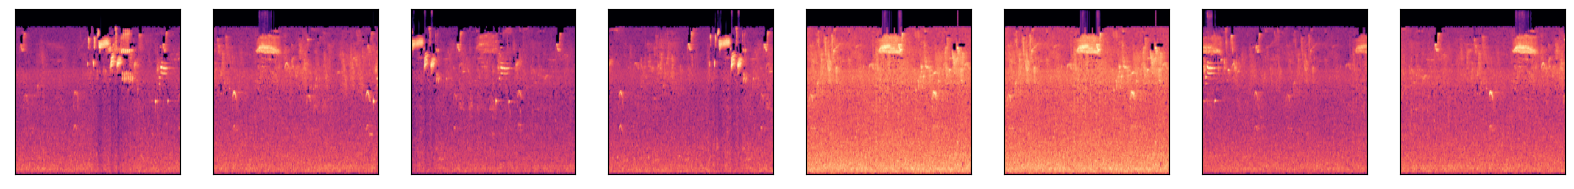

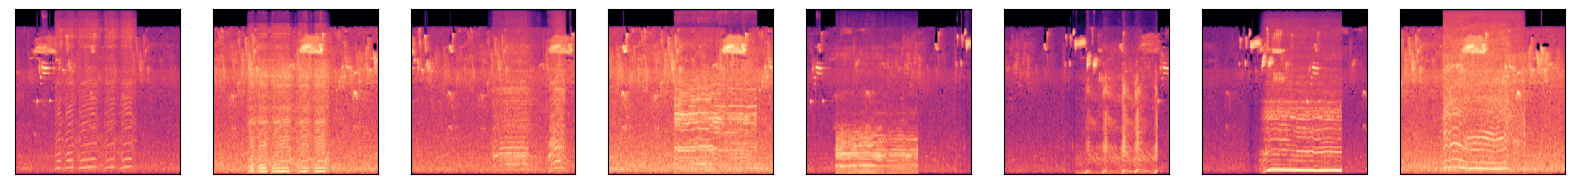

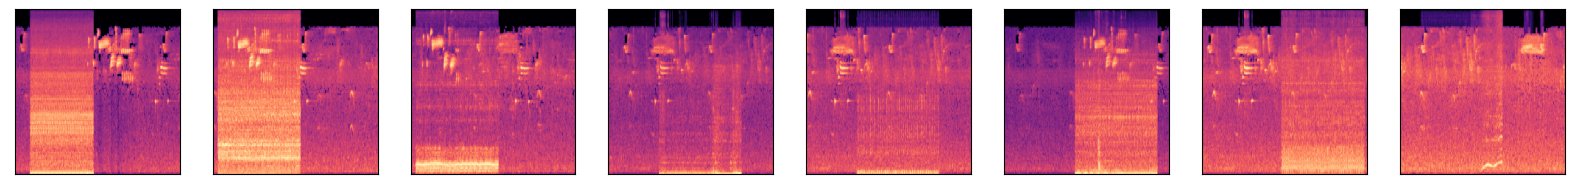

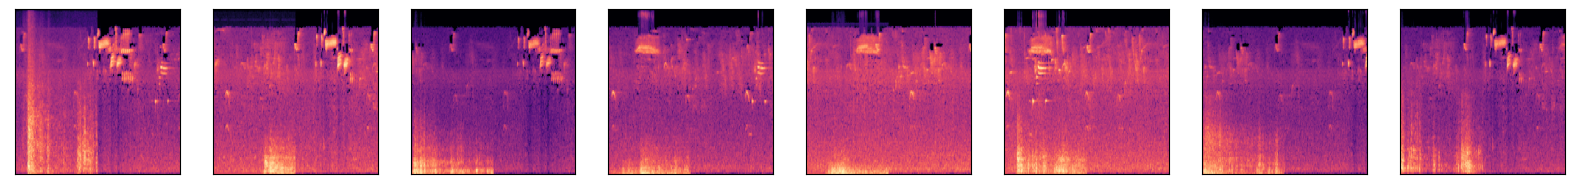

In [3]:
print("Background Sound:")
images, labels = load_images_from_path('Spectrograms/background', 0)
show_images(images)
    
x += images
y += labels

print("Chainsaw Sound:")
images, labels = load_images_from_path('Spectrograms/chainsaw', 1)
show_images(images)
    
x += images
y += labels

print("Engine Sound:")
images, labels = load_images_from_path('Spectrograms/engine', 2)
show_images(images)
    
x += images
y += labels

print("Storm Sound:")
images, labels = load_images_from_path('Spectrograms/storm', 3)
show_images(images)
    
x += images
y += labels

## split th dataset into two

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Build CNN Model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

## Training

In [6]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 [==============================] - 4s 45ms/step - loss: 1.4080 - accuracy: 0.3429 - val_loss: 1.1976 - val_accuracy: 0.4583
Epoch 2/10
28/28 [==============================] - 1s 38ms/step - loss: 0.9071 - accuracy: 0.5964 - val_loss: 0.7152 - val_accuracy: 0.6500
Epoch 3/10
28/28 [==============================] - 1s 38ms/step - loss: 0.6742 - accuracy: 0.7000 - val_loss: 0.6898 - val_accuracy: 0.6250
Epoch 4/10
28/28 [==============================] - 1s 38ms/step - loss: 0.6502 - accuracy: 0.6321 - val_loss: 0.5910 - val_accuracy: 0.7417
Epoch 5/10
28/28 [==============================] - 1s 38ms/step - loss: 0.5825 - accuracy: 0.7643 - val_loss: 1.3116 - val_accuracy: 0.4750
Epoch 6/10
28/28 [==============================] - 1s 38ms/step - loss: 0.7155 - accuracy: 0.6536 - val_loss: 0.6295 - val_accuracy: 0.6500
Epoch 7/10
28/28 [==============================] - 1s 38ms/step - loss: 0.4762 - accuracy: 0.7143 - val_loss: 0.6160 - val_accuracy: 0.7167
Epoch 8/10
28

## Plot the training and validation accuracy

[]

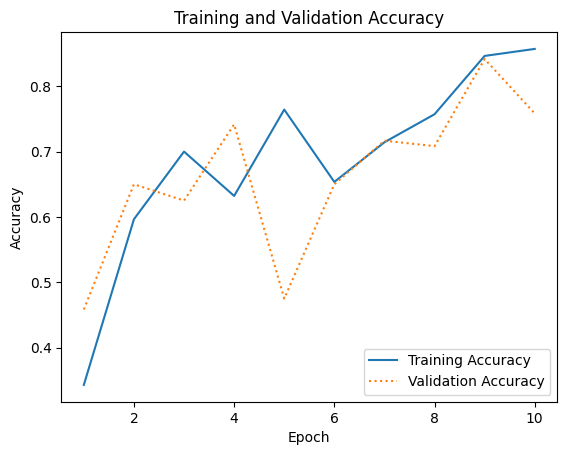

In [7]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Plot the confusion matrix

Text(110.44999999999997, 0.5, 'Actual label')

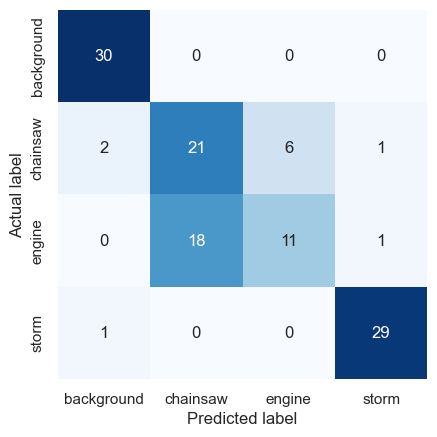

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['background', 'chainsaw', 'engine', 'storm']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

## Save the model

In [9]:
model.save('audio_classification.h5')

## Test the unrelated WAV files

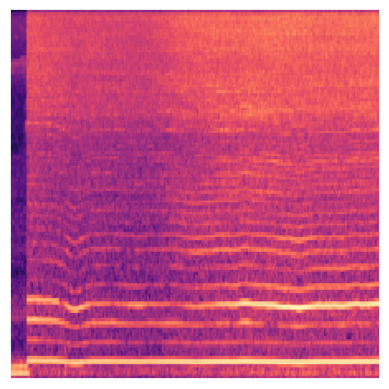

In [10]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))

plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [11]:
x_array = image.img_to_array(x)
print(x_array.shape)

(224, 224, 3)


In [12]:
from PIL import Image

class_labels = ['background', 'chainsaw', 'engine', 'storm']
# Resize
x = Image.open('Spectrograms/sample1.png')
x = x.resize((224, 224))

# convert('RGB')
x = x.convert('RGB')
# img to array
x_array = image.img_to_array(x)

# 
x_array = np.expand_dims(x_array, axis=0)

#
y = model.predict(x_array)

for i, label in enumerate(class_labels):
    print(f'{label}: {y[0][i]}')


background: 0.0
chainsaw: 1.0
engine: 0.0
storm: 0.0


## Another Test

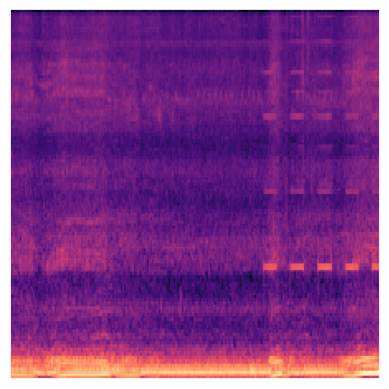

In [13]:
create_spectrogram('Sounds/samples/sample2.wav', 'Spectrograms/sample2.png')

z = image.load_img('Spectrograms/sample2.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(z)

In [14]:
from PIL import Image

class_labels = ['background', 'chainsaw', 'engine', 'storm']

z = Image.open('Spectrograms/sample1.png')
z = z.resize((224, 224))

z = z.convert('RGB')


x_array = image.img_to_array(z)


x_array = np.expand_dims(x_array, axis=0)


y = model.predict(x_array)

for i, label in enumerate(class_labels):
    print(f'{label}: {y[0][i]}')


background: 0.0
chainsaw: 1.0
engine: 0.0
storm: 0.0


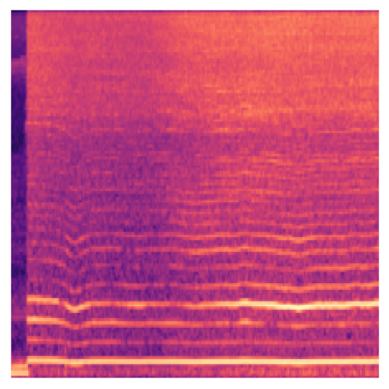

In [15]:
# import os
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt

# def create_spectrogram(audio_file, image_file):
#     # Load audio file
#     y, sr = librosa.load(audio_file)
    
#     # Generate mel spectrogram
#     mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
#     log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
#     # # Plot spectrogram
#     # plt.figure(figsize=(10, 4))
#     # librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
#     # plt.colorbar(format='%+2.0f dB')
#     # plt.title('Mel Spectrogram')
#     # plt.tight_layout()

#     # Save spectrogram as PNG image
#     plt.savefig(image_file)
#     plt.close()

# # Example usage
# audio_file = 'Spectrograms/storm_08.wav'
# image_file = 'Spectrograms/storm_08.png'
# create_spectrogram(audio_file, image_file)


create_spectrogram('Spectrograms/storm_08.wav', 'Spectrograms/storm_08.png')
k = image.load_img('Spectrograms/storm_08.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(z)

In [17]:
from PIL import Image

class_labels = ['background', 'chainsaw', 'engine', 'storm']

k = Image.open('Spectrograms/sample1.png')
k = k.resize((224, 224))

k = k.convert('RGB')


x_array = image.img_to_array(k)


x_array = np.expand_dims(x_array, axis=0)


y = model.predict(x_array)

for i, label in enumerate(class_labels):
    print(f'{label}: {y[0][i]}')

background: 0.0
chainsaw: 1.0
engine: 0.0
storm: 0.0
